In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
import numpy as np
from collections import defaultdict

In [23]:
filenames = [os.path.normpath(i) for i in glob.glob("D:/RNG_MEALPY/randomness_test/nist_test/*.txt")]
filenames

['D:\\RNG_MEALPY\\randomness_test\\nist_test\\beam_splitter_nist.txt',
 'D:\\RNG_MEALPY\\randomness_test\\nist_test\\ibm_com_nist.txt',
 'D:\\RNG_MEALPY\\randomness_test\\nist_test\\MT19937_nist.txt',
 'D:\\RNG_MEALPY\\randomness_test\\nist_test\\quasirandom_nist.txt']

In [24]:
order = 3
name = filenames[order][40:-4]
readFile = open(filenames[order], "r").read().splitlines()
numline = len(readFile)
test = readFile[7:195]
print(numline)
test

207


['100   0   0   0   0   0   0   0   0   0  0.000000 *    0/100  *  Frequency',
 '100   0   0   0   0   0   0   0   0   0  0.000000 *    0/100  *  BlockFrequency',
 '100   0   0   0   0   0   0   0   0   0  0.000000 *    0/100  *  CumulativeSums',
 '100   0   0   0   0   0   0   0   0   0  0.000000 *    0/100  *  CumulativeSums',
 '100   0   0   0   0   0   0   0   0   0  0.000000 *    0/100  *  Runs',
 '100   0   0   0   0   0   0   0   0   0  0.000000 *    0/100  *  LongestRun',
 '100   0   0   0   0   0   0   0   0   0  0.000000 *    0/100  *  Rank',
 '100   0   0   0   0   0   0   0   0   0  0.000000 *    0/100  *  FFT',
 '100   0   0   0   0   0   0   0   0   0  0.000000 *    0/100  *  NonOverlappingTemplate',
 '100   0   0   0   0   0   0   0   0   0  0.000000 *    0/100  *  NonOverlappingTemplate',
 '100   0   0   0   0   0   0   0   0   0  0.000000 *    0/100  *  NonOverlappingTemplate',
 '100   0   0   0   0   0   0   0   0   0  0.000000 *    0/100  *  NonOverlappingTemplate',


In [25]:
alpha = 0.01
k = 100
k_ex = 63 #### important to change this
upper = (1-alpha)+3*np.sqrt(alpha*(1-alpha)/k)
lower = (1-alpha)-3*np.sqrt(alpha*(1-alpha)/k)
upper_ex = (1-alpha)+3*np.sqrt(alpha*(1-alpha)/k_ex)
lower_ex = (1-alpha)-3*np.sqrt(alpha*(1-alpha)/k_ex)
print(upper, lower, upper_ex, lower_ex)

1.0198496231131986 0.9601503768868014 1.0276069902316805 0.9523930097683194


In [26]:
scatterValue = defaultdict(list)
scatterProp = defaultdict(list)
dneSet = set()
passPCount = 0
passPrCount = 0

for subTest in test:
    pVal = subTest[41:49]
    if pVal == "   ---- ":
        testName = subTest[64:]
        dneSet.add(testName)
    else:
        testName = subTest[65:]
        passSequence = float(subTest[53:56])
        allSequence = float(subTest[57:60])
        p = float(pVal)
        if p > 0.0001:
            passPCount += 1
        scatterValue[testName].append(p if p != 0 else 0.000001)
        pr = passSequence/allSequence

        if testName == "RandomExcursionsVariant" or testName == "RandomExcursions":
            if pr >= lower_ex and pr <= upper_ex:
                passPrCount +=1
        else:
            if pr >= lower and pr <= upper:
                passPrCount +=1
        scatterProp[testName].append(pr)

print(f"# p-value pass case: {passPCount}, failed: {len(test) - passPCount}\n# pass ratio case: {passPrCount}, failed: {len(test) - passPrCount}")

# p-value pass case: 1, failed: 187
# pass ratio case: 1, failed: 187


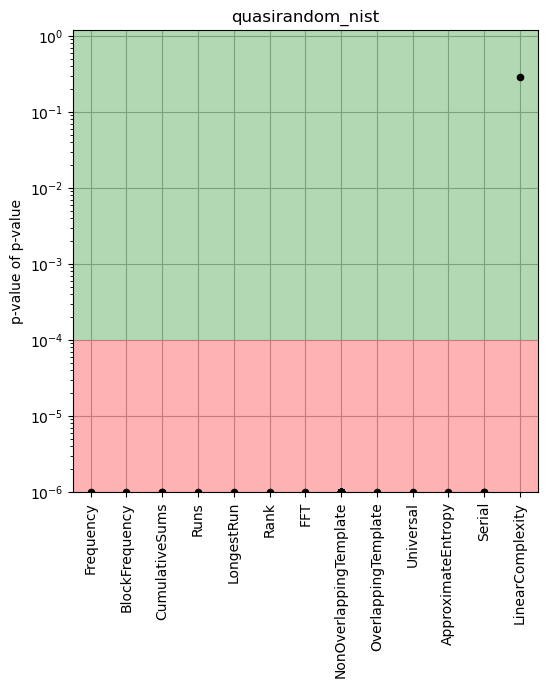

In [27]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)

ax.fill_between([-1,15], -0.1, 0.0001, color='red', alpha=0.3, lw = 0)
ax.fill_between([-1,15], 0.0001, 10, color='green', alpha=0.3, lw = 0)
plt.title(f"{name}")
plt.ylabel("p-value of p-value")
plt.xticks(rotation=90)

for (x, ys) in scatterValue.items():
    im = ax.scatter(
        [x] * len(ys),
        ys, 
        c="black", #
        linewidth=0, 
        s=30)

# fig.colorbar(im)
plt.yscale('log')
if numline == 208:
    plt.axis([-0.5, 14.5, 0.000001, 1.2])
else:
    plt.axis([-0.5, 12.5, 0.000001, 1.2])

ax.set_axisbelow(True)
ax.yaxis.grid()
ax.xaxis.grid()

plt.show()

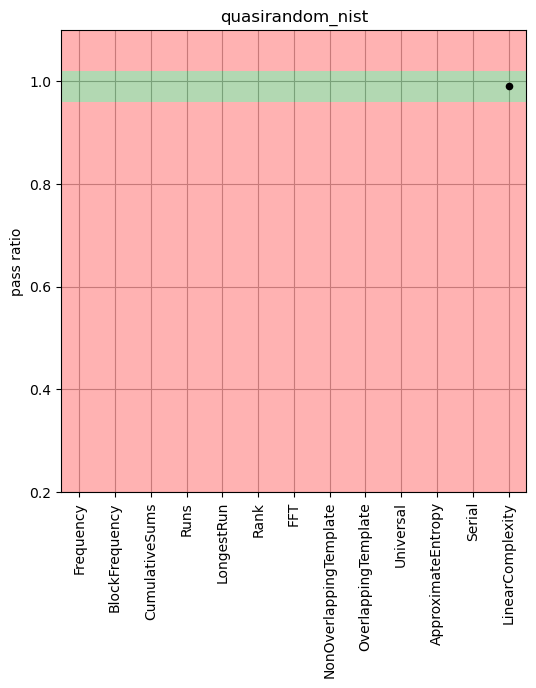

In [28]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)

if numline == 208:
    ax.fill_between([-1,10.5], -0.1, lower, color='red', alpha=0.3, lw = 0)
    ax.fill_between([-1,10.5], lower, upper, color='green', alpha=0.3, lw = 0)
    ax.fill_between([-1,10.5], upper, 1.1, color='red', alpha=0.3, lw = 0)
    ax.fill_between([10.5, 12.5], -0.1, lower_ex, color='red', alpha=0.3, lw = 0)
    ax.fill_between([10.5, 12.5], lower_ex, upper_ex, color='green', alpha=0.3, lw = 0)
    ax.fill_between([10.5, 12.5], upper_ex, 1.1, color='red', alpha=0.3, lw = 0)
    ax.fill_between([12.5,15.5], -0.1, lower, color='red', alpha=0.3, lw = 0)
    ax.fill_between([12.5,15.5], lower, upper, color='green', alpha=0.3, lw = 0)
    ax.fill_between([12.5,15.5], upper, 1.1, color='red', alpha=0.3, lw = 0)
else:
    ax.fill_between([-1,12.5], -0.1, lower, color='red', alpha=0.3, lw = 0)
    ax.fill_between([-1,12.5], lower, upper, color='green', alpha=0.3, lw = 0)
    ax.fill_between([-1,12.5], upper, 1.1, color='red', alpha=0.3, lw = 0)

plt.title(f"{name}")
plt.ylabel("pass ratio")
plt.xticks(rotation=90)


for (x, ys) in scatterProp.items():
    im = ax.scatter(
        [x] * len(ys),
        ys, 
        c="black", #
        linewidth=0, 
        s=30)

if numline == 208:
    plt.axis([-0.5, 14.5, 0.2, 1.1])
else:
    plt.axis([-0.5, 12.5, 0.2, 1.1])

ax.set_axisbelow(True)
ax.yaxis.grid()
ax.xaxis.grid()

plt.show()